<a href="https://colab.research.google.com/github/kalizhaankyzy/kaz_data_analysis/blob/main/kz_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file('/content/gadm41_KAZ_2.json')

print(gdf.head())
print(type(gdf))

       GID_2 GID_0     COUNTRY    GID_1  NAME_1 NL_NAME_1              NAME_2  \
0  KAZ.1.1_1   KAZ  Kazakhstan  KAZ.1_1  Almaty        NA            Aksuskiy   
1  KAZ.1.2_1   KAZ  Kazakhstan  KAZ.1_1  Almaty        NA          Alakolskiy   
2  KAZ.1.3_1   KAZ  Kazakhstan  KAZ.1_1  Almaty        NA    Almaty(Alma-Ata)   
3  KAZ.1.4_1   KAZ  Kazakhstan  KAZ.1_1  Almaty        NA        Balkhashskiy   
4  KAZ.1.5_1   KAZ  Kazakhstan  KAZ.1_1  Almaty        NA  Enbekshikazakhskiy   

     VARNAME_2 NL_NAME_2 TYPE_2 ENGTYPE_2 CC_2    HASC_2  \
0           NA        NA  Rayon  District   NA  KZ.AA.AK   
1  Alakol'skiy        NA  Rayon  District   NA  KZ.AA.AL   
2           NA        NA  Rayon  District   NA        NA   
3           NA        NA  Rayon  District   NA  KZ.AA.BA   
4           NA        NA  Rayon  District   NA  KZ.AA.EN   

                                            geometry  
0  MULTIPOLYGON (((80.2645 45.0494, 80.2564 45.04...  
1  MULTIPOLYGON (((82.5815 45.2178, 82.570

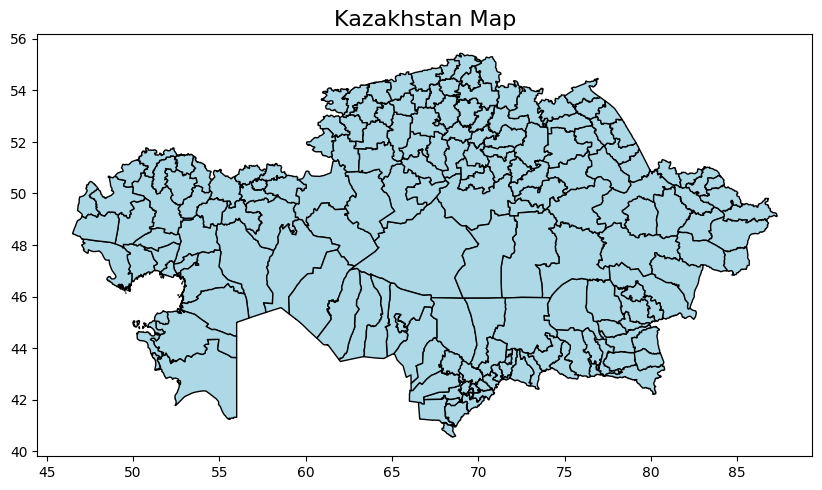

In [3]:
gdf.plot(figsize=(10, 8), edgecolor="black", color="lightblue")
plt.title("Kazakhstan Map", fontsize=16)
plt.show()

In [4]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

cities_df = pd.read_csv("/content/kz.csv")
cities_df

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Almaty,43.2400,76.9150,Kazakhstan,KZ,Almaty,admin,1916822.0,1916822.0
1,Shymkent,42.3167,69.5958,Kazakhstan,KZ,Shymkent,admin,1184113.0,1184113.0
2,Astana,51.1472,71.4222,Kazakhstan,KZ,Nur-Sultan,primary,1078362.0,1078362.0
3,Qaraghandy,49.8028,73.1056,Kazakhstan,KZ,Qaraghandy,admin,497777.0,497777.0
4,Öskemen,49.9833,82.6167,Kazakhstan,KZ,East Kazakhstan,admin,400142.0,400142.0
...,...,...,...,...,...,...,...,...,...
244,Köktöbe,51.5292,77.4733,Kazakhstan,KZ,Pavlodar,minor,NaN,NaN
245,Komsomol’skoe,50.4286,60.5056,Kazakhstan,KZ,Aqtöbe,minor,NaN,NaN
246,Kūrchatov,50.7567,78.5400,Kazakhstan,KZ,Abay,minor,NaN,NaN
247,Kīevka,50.2621,71.5484,Kazakhstan,KZ,Qaraghandy,minor,NaN,NaN


In [5]:
kaz_map = folium.Map(location=[43.25, 76.95], zoom_start=4)

folium.GeoJson(
    gdf,
    name="Kazakhstan Administrative Boundaries"
).add_to(kaz_map)

def get_marker_style(population):
    """
    Determines marker style based on population.
    """
    if population >= 1_000_000:
        return {"color": "red"}
    elif population >= 500_000:
        return {"color": "orange"}
    elif population >= 100_000:
        return {"color": "blue"}
    else:
        return {"color": "green"}

def calculate_radius(population, min_radius=4, max_radius=20):
    """
    Calculate marker radius based on population.
    Scales the population between min_radius and max_radius.
    """
    if population is None or population == 0:
        return min_radius  # Default for missing/zero population
    scaled_radius = min_radius + ((population - cities_df['population'].min()) /
                                   (cities_df['population'].max() - cities_df['population'].min())) * (max_radius - min_radius)
    return scaled_radius

# marker_cluster = MarkerCluster().add_to(kaz_map)

for _, city in cities_df.iterrows():
    if not pd.isna(city["lat"]) and not pd.isna(city["lng"]):
      population = city["population"]
      if not pd.isna(population):  # Ensure population is valid
            style = get_marker_style(population)
            radius = calculate_radius(population)
            # print(f"{city['city']}: {radius}")
            folium.CircleMarker(
                location=[city["lat"], city["lng"]],
                radius=radius,  # Size based on population
                color=style["color"],  # Border color
                fill=True,
                fill_color=style["color"],  # Fill color matches border
                fill_opacity=0.7,
                tooltip=f"{city['city']} ({int(population):,} people)"
            ).add_to(kaz_map)

kaz_map.save("Kazakhstan_Cities_Map.html")
kaz_map